In [1]:
using CSV, PyPlot, Clustering
xkcd()

PyObject <matplotlib.rc_context object at 0x7f03d1eacf60>

In [87]:
d = @time CSV.read("/home/quangio/dev/JuliaDashboard/NYUSH_data/CCNA_03496"; header=false, delim='\t', types=fill(Float64,2))
arr = transpose(convert(Matrix, d))[:, :]
n = size(d[1])[1]

  0.004479 seconds (6.48 k allocations: 228.859 KiB)


3669

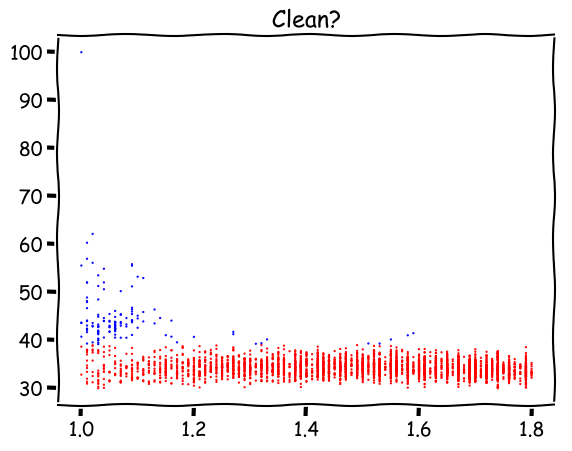

  0.007562 seconds (21.42 k allocations: 1.011 MiB)


PyObject Text(0.5, 1.0, 'Clean?')

In [5]:
process(idx) = begin
    d = @time CSV.read("/home/quangio/dev/JuliaDashboard/NYUSH_data/CCNA_$idx"; header=false, delim='\t', types=fill(Float64,2))
    arr = transpose(convert(Matrix, d))[:, :]
    n = size(d[1])[1]
    
    clusters = dbscan(arr, .24)
    colors = ["blue" for _=1:n]
    average = 0.0
    for i = clusters[1].core_indices
        colors[i] = "red"
        average += d[1][i]
    end
    average /= clusters[1].size

    for i = 1:n
        if d[1][i] < average
            colors[i] = "red"
        end
    end
    scatter(d[2], d[1], color=colors, s=.4)
    title("Clean?")
end
process(lpad(16, 5, '0'))
